# 1 Carga de datos

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
df = pd.read_csv("/home/clisueno/output/unificado.csv", quoting=1)
print(f"Cargado dataframe con {df.shape[0]} filas")
print(f"El dataframe tiene {len(df.columns)} columnas: \n {df.columns}")

Cargado dataframe con 991 filas
El dataframe tiene 42 columnas: 
 Index(['nombre', 'edad_anos', 'edad_meses', 'edad_dias', 'id', 'peso',
       'medida_peso', 'talla', 'medida_talla', 'imc', 'cuello',
       'medida_cuello', 'perimetro_abdominal', 'medida_perimetro_abdominal',
       'solicita', 'empresa', 'fecha_estudio', 'epworth', 'tiempo_en_cama',
       'tiempo_sueno', 'eficiencia_sueno', 'latencia_sueno_total',
       'latencia_sueno_rem', 'indice_microalertamientos',
       'porcentaje_sueno_rem', 'porcentaje_sueno_profundo', 'iac', 'iao',
       'iam', 'indice_desat_rem', 'indice_desat_nrem', 'indice_desat_total',
       'oxim_menor90_total', 'oxim_menor80_total', 'oxim_menor70_total',
       'oxim_menor60_total', 't90', 'numero_eventos_ah', 'ih', 'iah', 'fuente',
       'uuid'],
      dtype='object')


# 2 Asignación de tipos

## 2.1 Declaración de tipos

In [3]:
variables_str = [
    'nombre',
    'id',
    'medida_peso',
    'medida_talla',
    'medida_cuello',
    'medida_perimetro_abdominal',
    'solicita',
    'empresa',
    'fuente',
    'uuid'


]

variables_int = [


]

variables_float = [
    'edad_anos',
    'edad_meses',
    'edad_dias',
    'epworth',
    'peso',
    'talla',
    'imc',
    'cuello',
    'perimetro_abdominal',
    'tiempo_en_cama',
    'tiempo_sueno',
    'eficiencia_sueno',
    'latencia_sueno_total',
    'latencia_sueno_rem',
    'indice_microalertamientos',
    'porcentaje_sueno_rem',
    'porcentaje_sueno_profundo',
    'iac',
    'iao',
    'iam',
    'indice_desat_rem',
    'indice_desat_nrem',
    'indice_desat_total',
    'oxim_menor90_total',
    'oxim_menor80_total',
    'oxim_menor70_total',
    'oxim_menor60_total',
    't90',
    'ih',
    'iah',
    'numero_eventos_ah'


]

variables_datetime = ['fecha_estudio']

## 2.2 Definición de funciones

In [4]:
import pandas as pd
from datetime import datetime
import numpy as np
import warnings

# Variables DATETIME ***********************************

import pandas as pd
from datetime import datetime

def validar_transformar_datetime(df, variables):

    # Inicializar listas de resultados
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []

    def convertir_fecha(fecha_str):
        try:
            return pd.to_datetime(str(fecha_str).strip(), dayfirst=True, errors='coerce')
        except Exception:
            return pd.NaT

    for variable in variables:
        if variable not in df.columns:
            variables_no_encontradas.append(variable)
        else:
            # Aplicar conversión
            df[variable] = df[variable].apply(convertir_fecha)
            df[variable] = df[variable].dt.floor("D")  # elimina la hora, conserva datetime64[ns]

            # Verificar si se transformó exitosamente
            if df[variable].isna().all():
                variables_no_transformadas.append(variable)
            else:
                variables_transformadas.append(variable)

    # Reporte
    print("\n************ Resultado de la transformación DATETIME **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")

    return {
        "no_encontradas": variables_no_encontradas,
        "no_transformadas": variables_no_transformadas,
        "transformadas": variables_transformadas
    }


# Validación y transformación a INT *****************************

import pandas as pd

def validar_transformar_int(df, variables):

    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                # Reemplazar comas por puntos y convertir a número
                df[var] = df[var].astype(str).str.replace(',', '.', regex=False)
                df[var] = pd.to_numeric(df[var], errors='coerce').astype('Int64')

                if df[var].isna().all():
                    variables_no_transformadas.append(var)
                else:
                    variables_transformadas.append(var)

            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a enteros: {e}")

    print("\n************ Resultado de la transformación INT **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")

    return {
        "no_encontradas": variables_no_encontradas,
        "no_transformadas": variables_no_transformadas,
        "transformadas": variables_transformadas
    }


# Validación y transformación a FLOAT ************************************************

import pandas as pd

def validar_transformar_float(df, variables):
    
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                # Estandarizar separadores decimales
                df[var] = df[var].astype(str).str.replace(',', '.', regex=False)
                df[var] = pd.to_numeric(df[var], errors='coerce').astype(float)

                if df[var].isna().all():
                    variables_no_transformadas.append(var)
                else:
                    variables_transformadas.append(var)

            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a flotante: {e}")

    print("\n************ Resultado de la transformación FLOAT **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")

    return {
        "no_encontradas": variables_no_encontradas,
        "no_transformadas": variables_no_transformadas,
        "transformadas": variables_transformadas
    }


# Validación y transformación a STRING ****************************************

def validar_transformar_str(df, variables):

    import warnings
    import pandas as pd

    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []
    variables_con_warnings = []

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                with warnings.catch_warnings(record=True) as w:
                    warnings.simplefilter("always", UserWarning)

                    df[var] = df[var].astype("string")  # usa tipo string (acepta pd.NA)

                    if len(w) > 0:
                        variables_con_warnings.append(var)

                    if df[var].isna().all():
                        variables_no_transformadas.append(var)
                    else:
                        variables_transformadas.append(var)

            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a cadena: {e}")

    print("\n************ Resultado de la transformación STR **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_con_warnings)} Variables transformadas con warnings: {variables_con_warnings}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")

print("Finalizado ")


Finalizado 


## 2.3 Aplicación

In [5]:
validar_transformar_int(df,variables_int)
validar_transformar_float(df,variables_float)
validar_transformar_datetime(df,variables_datetime)
validar_transformar_str(df,variables_str)


************ Resultado de la transformación INT **************

0 Variables no encontradas: []
0 Variables no transformadas: []
0 Variables transformadas exitosamente: []

************ Resultado de la transformación FLOAT **************

0 Variables no encontradas: []
1 Variables no transformadas: ['edad_dias']
30 Variables transformadas exitosamente: ['edad_anos', 'edad_meses', 'epworth', 'peso', 'talla', 'imc', 'cuello', 'perimetro_abdominal', 'tiempo_en_cama', 'tiempo_sueno', 'eficiencia_sueno', 'latencia_sueno_total', 'latencia_sueno_rem', 'indice_microalertamientos', 'porcentaje_sueno_rem', 'porcentaje_sueno_profundo', 'iac', 'iao', 'iam', 'indice_desat_rem', 'indice_desat_nrem', 'indice_desat_total', 'oxim_menor90_total', 'oxim_menor80_total', 'oxim_menor70_total', 'oxim_menor60_total', 't90', 'ih', 'iah', 'numero_eventos_ah']

************ Resultado de la transformación DATETIME **************

0 Variables no encontradas: []
0 Variables no transformadas: []
1 Variables transfor

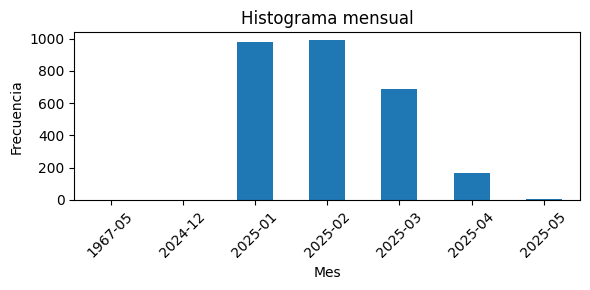

In [6]:
import matplotlib.pyplot as plt

(df["fecha_estudio"]
 .dt.to_period("M")
 .value_counts()
 .sort_index()
 .plot(kind="bar", figsize=(6, 3)))

plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Histograma mensual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3 Transformación

## 3.1 Edad a años

In [6]:
df["edad_anos_decimal"] = (
    df["edad_anos"].fillna(0) +
    df["edad_meses"].fillna(0) / 12 +
    df["edad_dias"].fillna(0) / 365.25
)

## 3.2 Peso a Kg

In [7]:
# Unificación de unidades: todo a minúsculas y sin espacios
df["medida_peso"] = df["medida_peso"].str.lower().str.strip()

# Definimos sets de unidades por tipo
unidades_kg = {"kg", "kgs", "kgr", "kl"}
unidades_g = {"g", "gr", "grs"}

# Cálculo de peso en kilogramos
df["peso_kg"] = df.apply(
    lambda row: row["peso"] / 1000 if row["medida_peso"] in unidades_g
    else row["peso"] if row["medida_peso"] in unidades_kg
    else None,  # o np.nan
    axis=1
)

# Verificación de que no hay unidades no contempladas
print("\nUnidades de peso no contempladas: \n")
print(df[~df["medida_peso"].isin(unidades_kg.union(unidades_g))]["medida_peso"].value_counts())



Unidades de peso no contempladas: 

Series([], Name: count, dtype: Int64)


## 3.3 Talla a cms

In [8]:
# Limpieza de texto
df["medida_talla"] = df["medida_talla"].str.lower().str.strip()

# Definir sets de unidades
unidades_metros = {"m", "mts", "metros"}
unidades_centimetros = {"c", "cm", "cms", "a"}

# Reemplazar nulos por 0 (si lo consideras seguro)
df["talla"] = df["talla"].fillna(0)

# Calcular talla en cm
df["talla_cm"] = df.apply(
    lambda row: row["talla"] * 100 if row["medida_talla"] in unidades_metros
    else row["talla"] if row["medida_talla"] in unidades_centimetros
    else None,
    axis=1
)

# Verificación de que no hay unidades no contempladas
print("\nUnidades de talla no contempladas: \n")
print(df[~df["medida_talla"].isin(["cm", "m"])]["medida_talla"].value_counts())


Unidades de talla no contempladas: 

Series([], Name: count, dtype: Int64)


## 3.4 Cuello a cms

In [9]:
# Limpieza del texto
df["medida_cuello"] = df["medida_cuello"].str.lower().str.strip()

# Definir unidades válidas
unidades_metros = {"m", "mts", "metros"}
unidades_centimetros = {"c", "cm", "cms"}
unidades_cuello_validas = unidades_metros.union(unidades_centimetros)

# Rellenar nulos si aplica
df["cuello"] = df["cuello"].fillna(0)

# Calcular cuello en cm
df["cuello_cm"] = df.apply(
    lambda row: row["cuello"] * 100 if row["medida_cuello"] in unidades_metros
    else row["cuello"] if row["medida_cuello"] in unidades_centimetros
    else None,
    axis=1
)

# Verificación de que no hay unidades no contempladas
print("\nUnidades de cuello no contempladas: \n")
print(df[~df["medida_cuello"].isin(unidades_cuello_validas)]["medida_cuello"].value_counts())


Unidades de cuello no contempladas: 

Series([], Name: count, dtype: Int64)


## 3.5 Perimetro abdominal a cms

In [11]:
# Limpieza del texto
df["medida_perimetro_abdominal"] = df["medida_perimetro_abdominal"].str.lower().str.strip()

# Definir unidades válidas
unidades_metros = {"m", "ms", "mts"}
unidades_centimetros = {"cm", "cms", "cm.", ".cm", ".ccm", "ccm"}
unidades_abdominal_validas = unidades_metros.union(unidades_centimetros)

# Reemplazar nulos si aplica
df["perimetro_abdominal"] = df["perimetro_abdominal"].fillna(0)

# Calcular perímetro abdominal en cm
df["perimetro_abdominal_cm"] = df.apply(
    lambda row: row["perimetro_abdominal"] * 100 if row["medida_perimetro_abdominal"] in unidades_metros
    else row["perimetro_abdominal"] if row["medida_perimetro_abdominal"] in unidades_centimetros
    else None,
    axis=1
)

# Verificación de que no hay unidades no contempladas
print("\nUnidades de perímetro abdominal no contempladas: \n")
print(df[~df["medida_perimetro_abdominal"].isin(unidades_abdominal_validas)]["medida_perimetro_abdominal"].value_counts())


Unidades de perímetro abdominal no contempladas: 

Series([], Name: count, dtype: Int64)


## Selección de columnas a cargar

In [12]:
columnas_finales = [
    'nombre','id', 'imc', 'solicita', 'empresa', 'fecha_estudio', 'epworth', 
    'tiempo_en_cama', 'tiempo_sueno', 'eficiencia_sueno', 'latencia_sueno_total',
    'latencia_sueno_rem', 'indice_microalertamientos', 'porcentaje_sueno_rem', 
    'porcentaje_sueno_profundo', 'iac', 'iao', 'iam', 'indice_desat_rem',
    'indice_desat_nrem', 'indice_desat_total', 'oxim_menor90_total', 
    'oxim_menor80_total', 'oxim_menor70_total', 'oxim_menor60_total', 't90',
    'numero_eventos_ah', 'ih', 'iah', 'fuente', 'uuid', 'edad_anos_decimal', 
    'peso_kg', 'talla_cm', 'cuello_cm', 'perimetro_abdominal_cm'
]

In [13]:
df = df[columnas_finales]

In [14]:
# Agrega la columna de version control
ahora = datetime.today().strftime('%Y-%m-%d : %H:%M:%S')
df['version_control'] = 'Extraido en: ' + ahora

# 4 EDA

## 4.1 Sumamrize dataframe

### a. Definición

In [107]:
from IPython.display import display, HTML

def format_large_numbers(value):
    """
    Formatea valores numéricos.
    - Valores mayores o menores a ±1E+06 se muestran en notación científica.
    - Otros valores se redondean a dos decimales.
    """
    if isinstance(value, (int, float)):
        if abs(value) > 1e6:
            return f"{value:.2E}"
        return f"{value:.2f}"
    return value  # Retorna el valor original si no es numérico


def summarize_statistics(df):
    """
    Extrae estadísticas básicas (mean, min, max) y las formatea,
    aplicando el cálculo solo a columnas numéricas.
    """
    # Seleccionamos solo las columnas numéricas
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Reemplazamos los valores -9999 por NaN en las columnas numéricas
    df_numeric = df_numeric.replace({-9999: np.nan})
    
    # Calculamos las estadísticas básicas sobre las columnas numéricas
    stats = df_numeric.describe().loc[['mean', 'min', 'max']]
    
    # Usamos apply con map para evitar FutureWarning de applymap
    formatted_stats = stats.apply(lambda col: col.map(format_large_numbers))
    
    return formatted_stats


def calculate_missing_values(df):
    """
    Calcula la cantidad y porcentaje de valores faltantes.
    """
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    return pd.DataFrame({
        'Missing Values': missing_values,
        'Missing %': missing_percentage.map(lambda x: f"{x:.2f}%")
    })


def calculate_unique_values(df):
    """
    Calcula la cantidad y porcentaje de valores únicos.
    """
    unique_values = df.nunique()
    unique_percentage = (unique_values / len(df)) * 100
    return pd.DataFrame({
        'Unique Values': unique_values,
        'Unique %': unique_percentage.map(lambda x: f"{x:.2f}%")
    })


def extract_sample_values(df):
    """
    Extrae un valor de muestra por columna, excluyendo NaN y ceros.
    """
    samples = []
    for col in df.columns:
        non_na_values = df[col].dropna()
        non_zero_values = non_na_values[non_na_values != 0]
        if not non_zero_values.empty:
            samples.append(non_zero_values.iloc[0])  # Primer valor válido
        else:
            samples.append("N/A")
    return samples


def calculate_category_frequencies(df):
    """
    Calcula la frecuencia de valores en columnas categóricas,
    ignorando variables que contienen 'fecha'.
    Limita a 10 categorías y agrupa las restantes en 'OTROS'.
    """
    frequencies = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            if 'fecha' not in col.lower():
                # Calcular frecuencias
                freq = df[col].value_counts()

                # Separar las 10 más frecuentes y agrupar el resto en "OTROS"
                top_10 = freq[:10]
                others_sum = freq[10:].sum()
                if others_sum > 0:
                    top_10 = pd.concat([top_10, pd.Series({'OTROS': others_sum})])

                # Formatear como cadena concatenada
                freq_str = '"{}"'.format(' | '.join([f"{k}: {v}" for k, v in top_10.items()]))

                frequencies.append(freq_str)
            else:
                frequencies.append("N/A")
        else:
            frequencies.append("N/A")
    return frequencies


def summarize_dataframe(df):
    """
    Genera un resumen detallado de un DataFrame.
    """
    variables = df.columns.tolist()
    summary_stats = summarize_statistics(df)
    data_types = df.dtypes
    missing_info = calculate_missing_values(df)
    unique_info = calculate_unique_values(df)
    sample_values = extract_sample_values(df)
    category_frequencies = calculate_category_frequencies(df)

    # Crear DataFrame resumen
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': [data_types[col] for col in variables],
        'Count': [df[col].count() for col in variables],
        'Unique Values': [f"{unique_info.loc[col, 'Unique Values']} ({unique_info.loc[col, 'Unique %']})" for col in variables],
        'Category Frequencies': category_frequencies,
        'Missing Values': [f"{missing_info.loc[col, 'Missing Values']} ({missing_info.loc[col, 'Missing %']})" for col in variables],
        'Min': [summary_stats[col]['min'] if col in summary_stats.columns else "N/A" for col in variables],
        'Mean': [summary_stats[col]['mean'] if col in summary_stats.columns else "N/A" for col in variables],
        'Max': [summary_stats[col]['max'] if col in summary_stats.columns else "N/A" for col in variables],
        'Sample': sample_values
    })

    # Mostrar como HTML
    display(HTML(summary_df.to_html(index=False)))


### b. Aplicación

In [108]:
summarize_dataframe(df)

Variable,Data Type,Count,Unique Values,Category Frequencies,Missing Values,Min,Mean,Max,Sample
nombre,string[python],2840,2827 (99.54%),N/A,0 (0.00%),N/A,N/A,N/A,ADEMAR MIRANDA ORTIZ
edad_anos,float64,2824,97 (3.42%),N/A,16 (0.56%),1.00,53.25,173.00,65.0
edad_meses,float64,14,13 (0.46%),N/A,2826 (99.51%),2.00,11.36,23.00,13.0
edad_dias,float64,4,4 (0.14%),N/A,2836 (99.86%),3.00,12.25,27.00,3.0
id,string[python],2840,2823 (99.40%),N/A,0 (0.00%),N/A,N/A,N/A,19397494
peso,float64,2798,212 (7.46%),N/A,42 (1.48%),0.00,79.81,8500.00,87.0
medida_peso,string[python],2798,2 (0.07%),N/A,42 (1.48%),N/A,N/A,N/A,kg
talla,float64,2840,138 (4.86%),N/A,0 (0.00%),0.00,157.29,202.00,170.0
medida_talla,string[python],2801,2 (0.07%),N/A,39 (1.37%),N/A,N/A,N/A,cm
imc,float64,2830,1160 (40.85%),N/A,10 (0.35%),0.13,28.25,78.00,30.1


---

# 5. Carga a Zona Cruda (Google Sheets)

## 5.1 Definiicón dwe la funcióm

In [15]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials

def exportar_df_a_google_sheets(
    df: pd.DataFrame,
    spreadsheet_id: str,
    hoja: str,
    creds_path: str,
    variables_str: list,
    variables_int: list,
    variables_float: list,
    variables_percent: list,
    variables_datetime: list
):
    # 1. Autenticación
    scope = [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
        "https://www.googleapis.com/auth/spreadsheets"
    ]
    creds = Credentials.from_service_account_file(creds_path, scopes=scope)
    client = gspread.authorize(creds)

    # 2. Validación de coherencia
    percent_not_in_float = [col for col in variables_percent if col not in variables_float]
    if percent_not_in_float:
        raise ValueError(f"Las siguientes columnas están en variables_percent pero no en variables_float: {percent_not_in_float}")

    # 3. Convertir columnas de porcentaje a decimal
    for col in variables_percent:
        if col in df:
            df[col] = df[col] / 100

    # 4. Abrir hoja y limpiar
    spreadsheet = client.open_by_key(spreadsheet_id)
    worksheet = spreadsheet.worksheet(hoja)
    worksheet.clear()

    # 5. Escribir DataFrame
    set_with_dataframe(worksheet, df)

    # 6. Construir diccionario de formatos por columna
    column_formats = {}
    for i, col in enumerate(df.columns):
        if col in variables_str:
            column_formats[i] = {"numberFormat": {"type": "TEXT", "pattern": "@"}}
        elif col in variables_int:
            column_formats[i] = {"numberFormat": {"type": "NUMBER", "pattern": "0"}}
        elif col in variables_percent:
            column_formats[i] = {"numberFormat": {"type": "PERCENT", "pattern": "0.00%"}}
        elif col in variables_float:
            column_formats[i] = {"numberFormat": {"type": "NUMBER", "pattern": "0.00"}}
        elif col in variables_datetime:
            column_formats[i] = {"numberFormat": {"type": "DATE", "pattern": "yyyy-mm-dd"}}

    # 7. Preparar batch_update con repeatCell
    requests = []
    for col_index, format_options in column_formats.items():
        requests.append({
            "repeatCell": {
                "range": {
                    "sheetId": worksheet._properties["sheetId"],
                    "startRowIndex": 1,  # desde fila 2 (excluye encabezado)
                    "startColumnIndex": col_index,
                    "endColumnIndex": col_index + 1
                },
                "cell": {
                    "userEnteredFormat": format_options
                },
                "fields": "userEnteredFormat.numberFormat"
            }
        })

    # 8. Ejecutar actualización de formatos
    if requests:
        response = spreadsheet.batch_update({"requests": requests})
        print(f"Formatos aplicados: {response}")
    else:
        print("No se definieron formatos para aplicar.")


---

## 5.2 Aplicación de la función (Envío a staging area)

In [16]:
variables_percent = ['eficiencia_sueno', 'porcentaje_sueno_rem', 'porcentaje_sueno_profundo', 't90']

spreadsheet_id="1KI8_Df7G9RUco-0FLPqTiFsyLC1r98T_pR3CsHZAu0s"
hoja="Data"
creds_path="/home/clisueno/secrets/observatorio-ino-1-78cfc246d28f-key.json"

exportar_df_a_google_sheets(
    df=df,
    spreadsheet_id = spreadsheet_id,
    hoja = hoja,
    creds_path = creds_path,
    variables_str=variables_str,
    variables_int=variables_int,
    variables_float=variables_float,
    variables_percent=variables_percent,
    variables_datetime=variables_datetime
)

Formatos aplicados: {'spreadsheetId': '1KI8_Df7G9RUco-0FLPqTiFsyLC1r98T_pR3CsHZAu0s', 'replies': [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]}
